C:\Users\ravee\AppData\Local\Temp\ipykernel_7488\1243059507.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


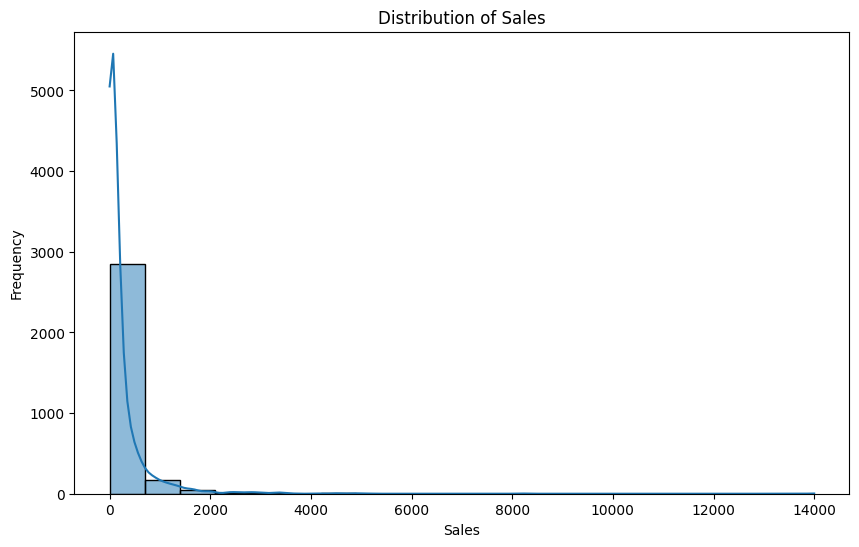

In [3]:
# Import libraries
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to MySQL database
conn = mysql.connector.connect(host="localhost", user="root", passwd="Ravi@8179", database="amazon")

# Define SQL query
query = "SELECT * FROM amazon1"

# Read data into Pandas DataFrame
df = pd.read_sql(query, conn)

# Data visualization: Example 1 (histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=20, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

# Close the database connection
conn.close()

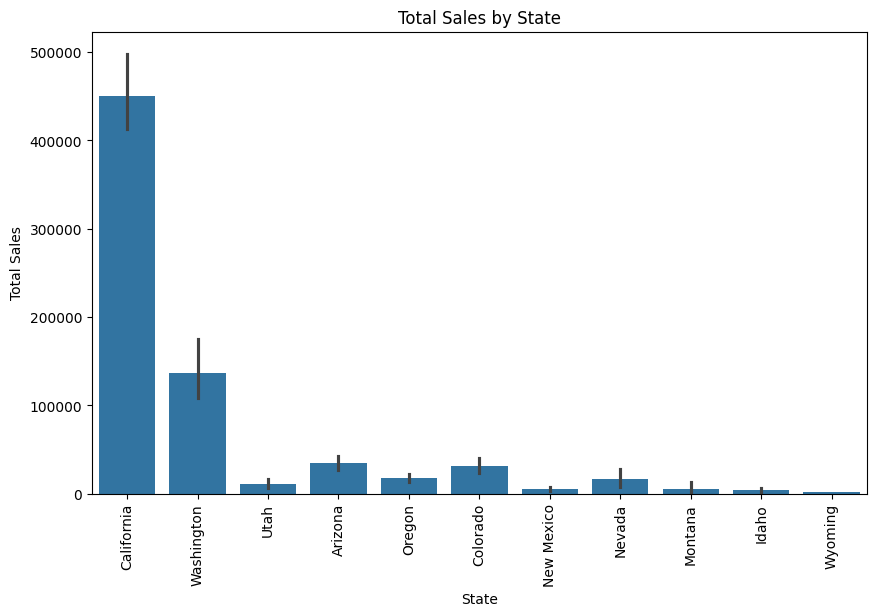

In [13]:
#Bar Plot of Total Sales by Country
plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='Sales', data=df, estimator=sum)
plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()


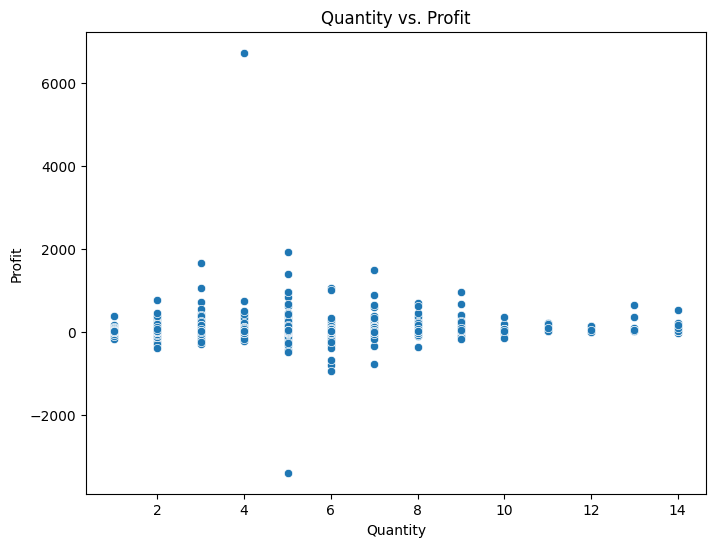

In [14]:
#  Scatter Plot of Profit vs. Quantity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Quantity', y='Profit', data=df)
plt.title('Quantity vs. Profit')
plt.xlabel('Quantity')
plt.ylabel('Profit')
plt.show()


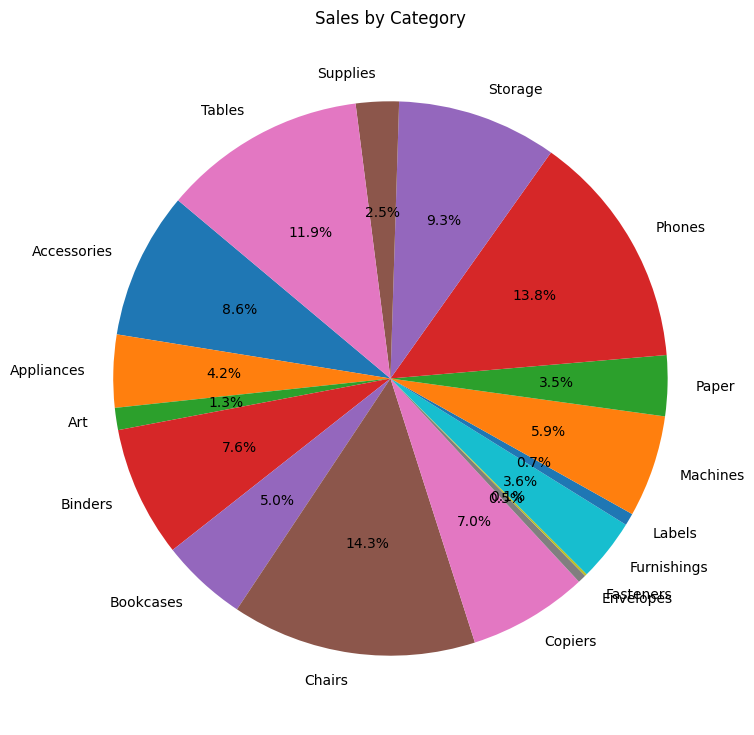

In [6]:
# Pie Chart of Sales Distribution by Category
sales_by_category = df.groupby('Category')['Sales'].sum()
plt.figure(figsize=(9, 9))
plt.pie(sales_by_category, labels=sales_by_category.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales by Category')
plt.show()



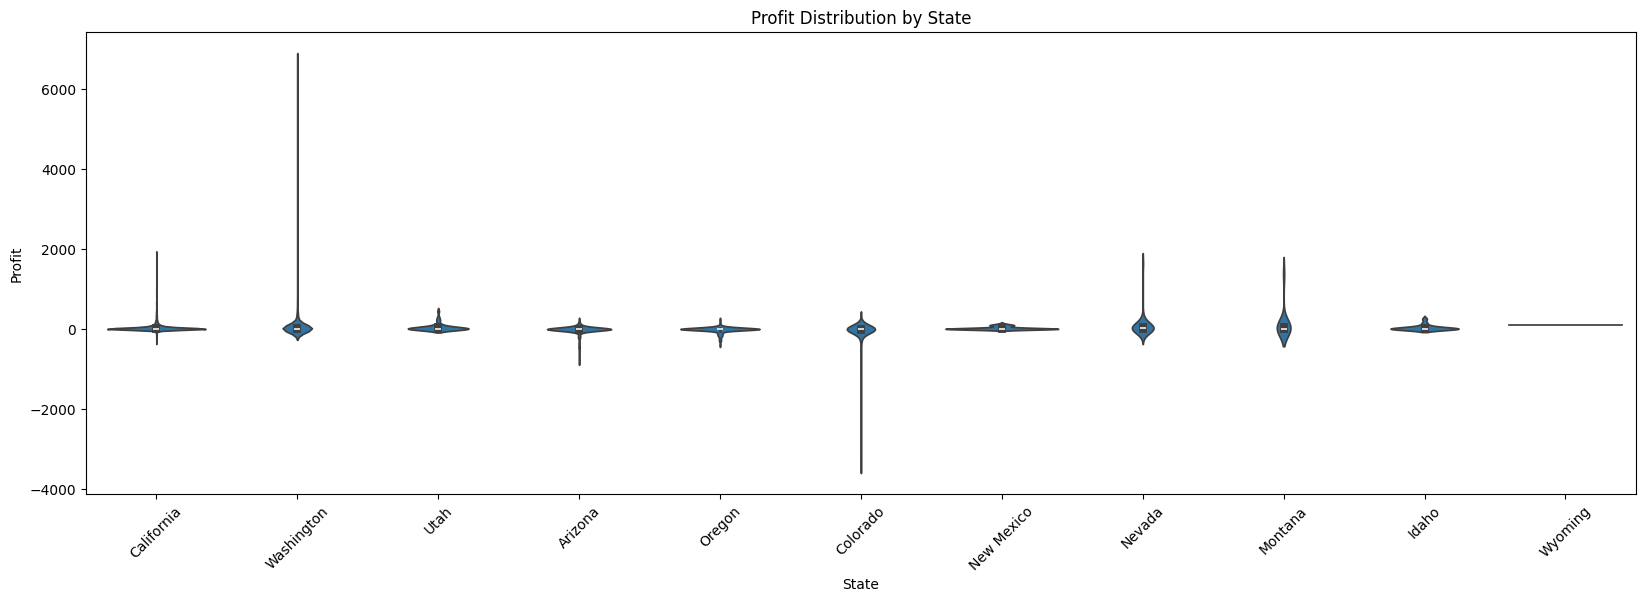

In [21]:
#Violin Plot of Profit Distribution by State
plt.figure(figsize=(20, 6))
sns.violinplot(x='State', y='Profit', data=df)
plt.title('Profit Distribution by State')
plt.xlabel('State')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()


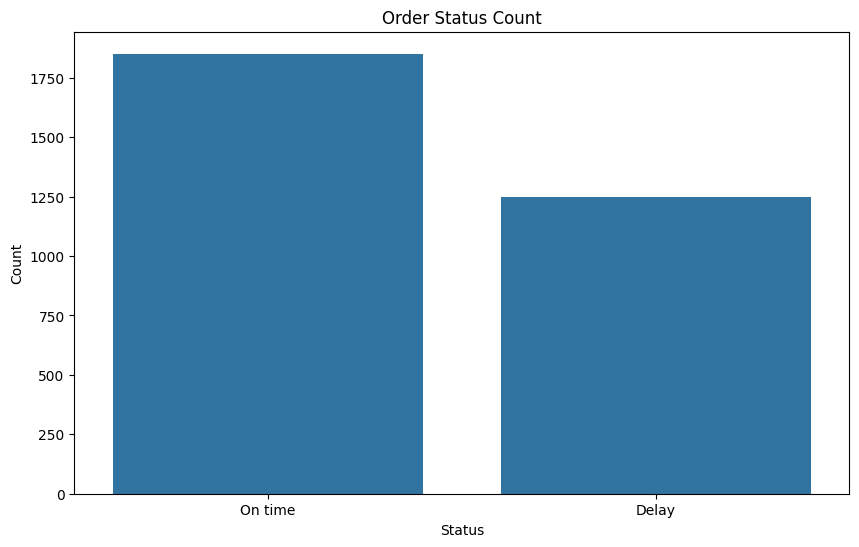

In [22]:
# Count Plot of Order Status
plt.figure(figsize=(10, 6))
sns.countplot(x='Status', data=df)
plt.title('Order Status Count')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


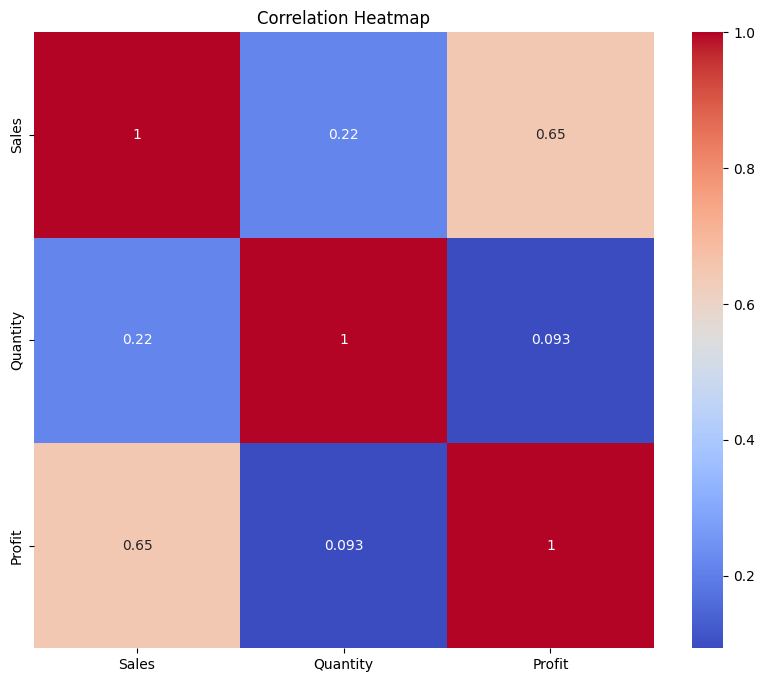

In [24]:
#Heatmap of Correlation Matrix
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Create the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


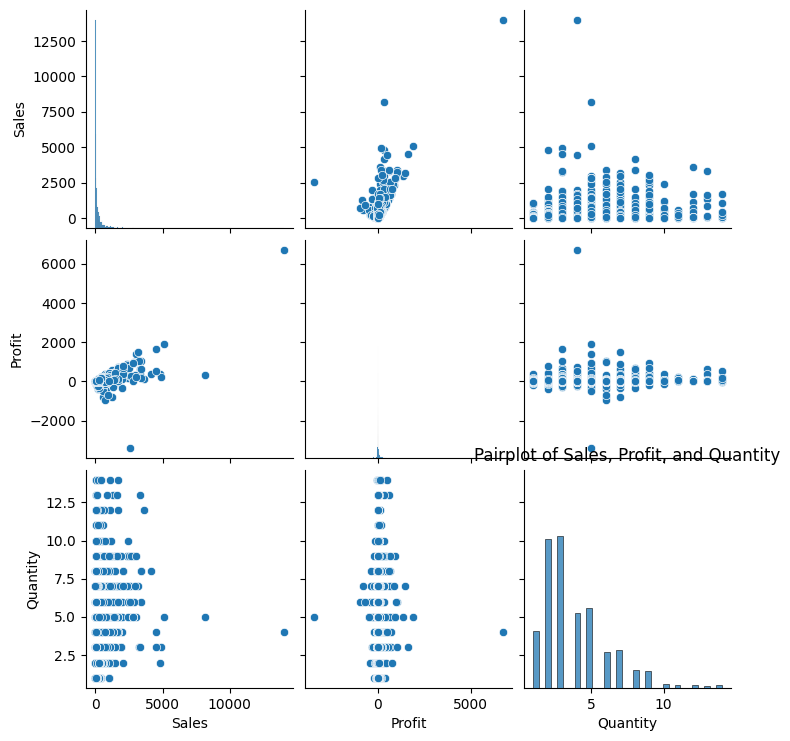

In [25]:
# Pairplot of Sales, Profit, and Quantity
sns.pairplot(df[['Sales', 'Profit', 'Quantity']])
plt.title('Pairplot of Sales, Profit, and Quantity')
plt.show()


C:\Users\ravee\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 93.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ravee\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 96.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ravee\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 98.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ravee\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 94.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

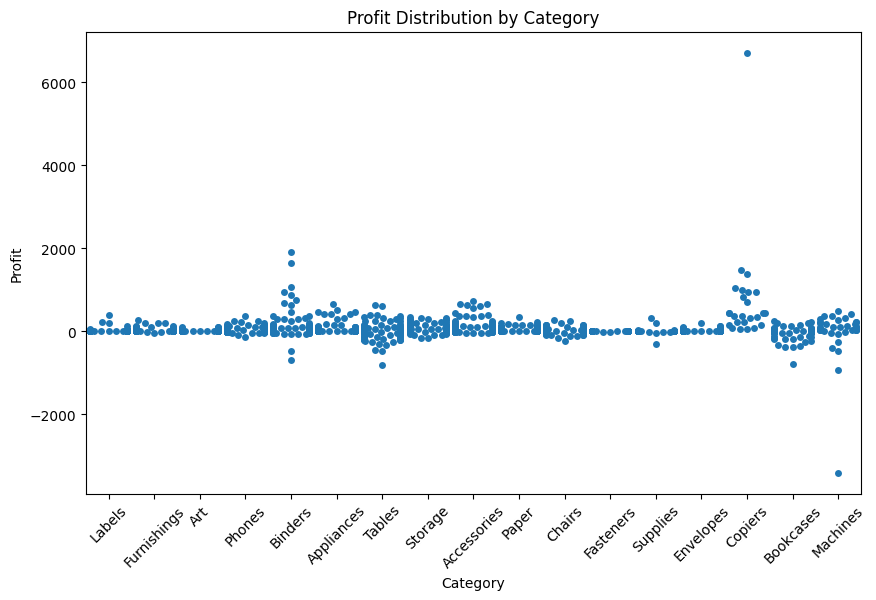

In [27]:
# Swarm Plot of Profit by Category
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Category', y='Profit', data=df)
plt.title('Profit Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()

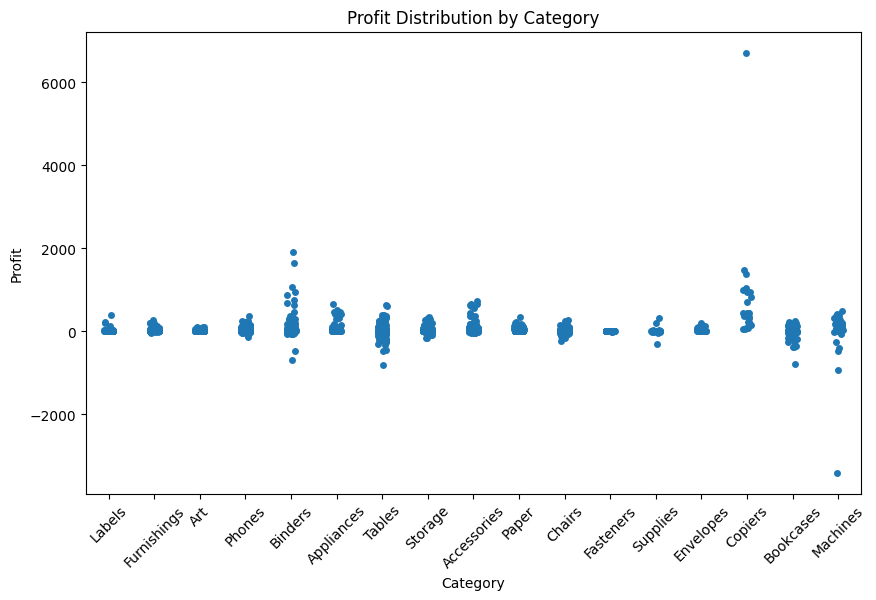

In [28]:
#Strip Plot of Profit by Category
plt.figure(figsize=(10, 6))
sns.stripplot(x='Category', y='Profit', data=df)
plt.title('Profit Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()


C:\Users\ravee\AppData\Local\Temp\ipykernel_19968\1580255908.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Sales'], shade=True)


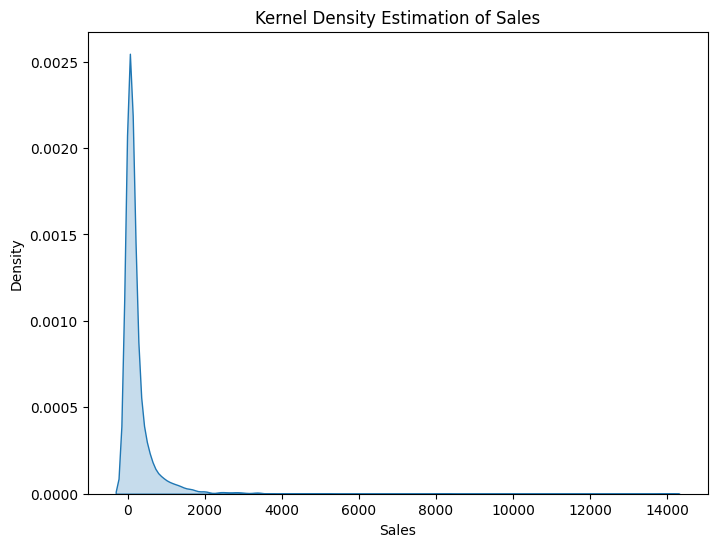

In [29]:
#KDE Plot of Sales
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Sales'], shade=True)
plt.title('Kernel Density Estimation of Sales')
plt.xlabel('Sales')
plt.ylabel('Density')
plt.show()


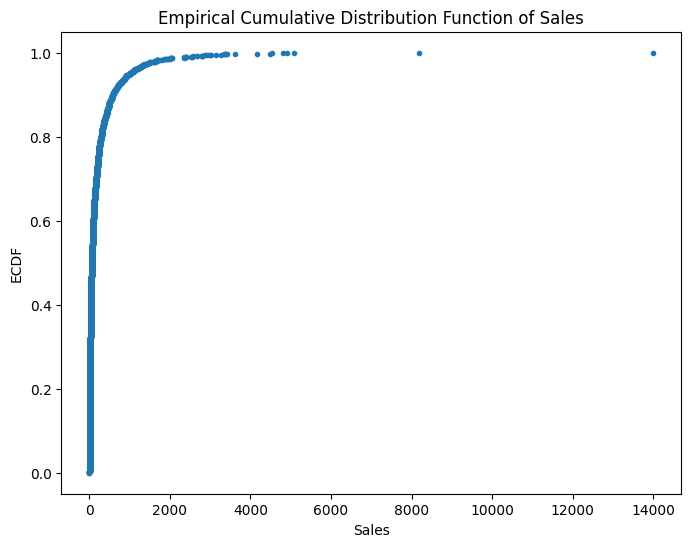

In [31]:
#ECDF Plot of Sales
import numpy as np

def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

x, y = ecdf(df['Sales'])
plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='.', linestyle='none')
plt.title('Empirical Cumulative Distribution Function of Sales')
plt.xlabel('Sales')
plt.ylabel('ECDF')
plt.show()


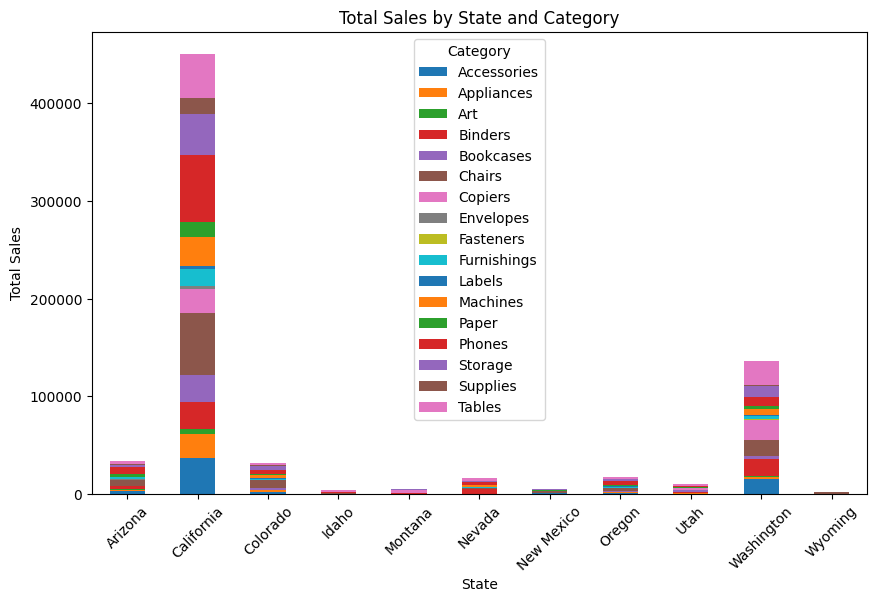

In [33]:
#  Stacked Bar Plot of Total Sales by State and Category
sales_by_country_category = df.groupby(['State', 'Category'])['Sales'].sum().unstack()
sales_by_country_category.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Total Sales by State and Category')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


C:\Users\ravee\AppData\Local\Temp\ipykernel_19968\3825194324.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Category', y='Sales', data=df, ci='sd')


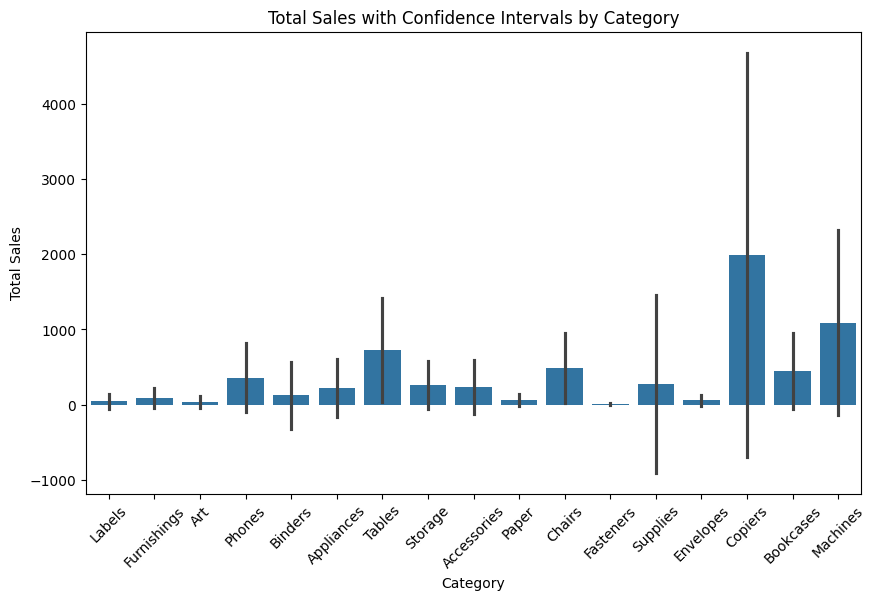

In [34]:
# Error Bar Plot of Total Sales with Confidence Intervals by Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=df, ci='sd')
plt.title('Total Sales with Confidence Intervals by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


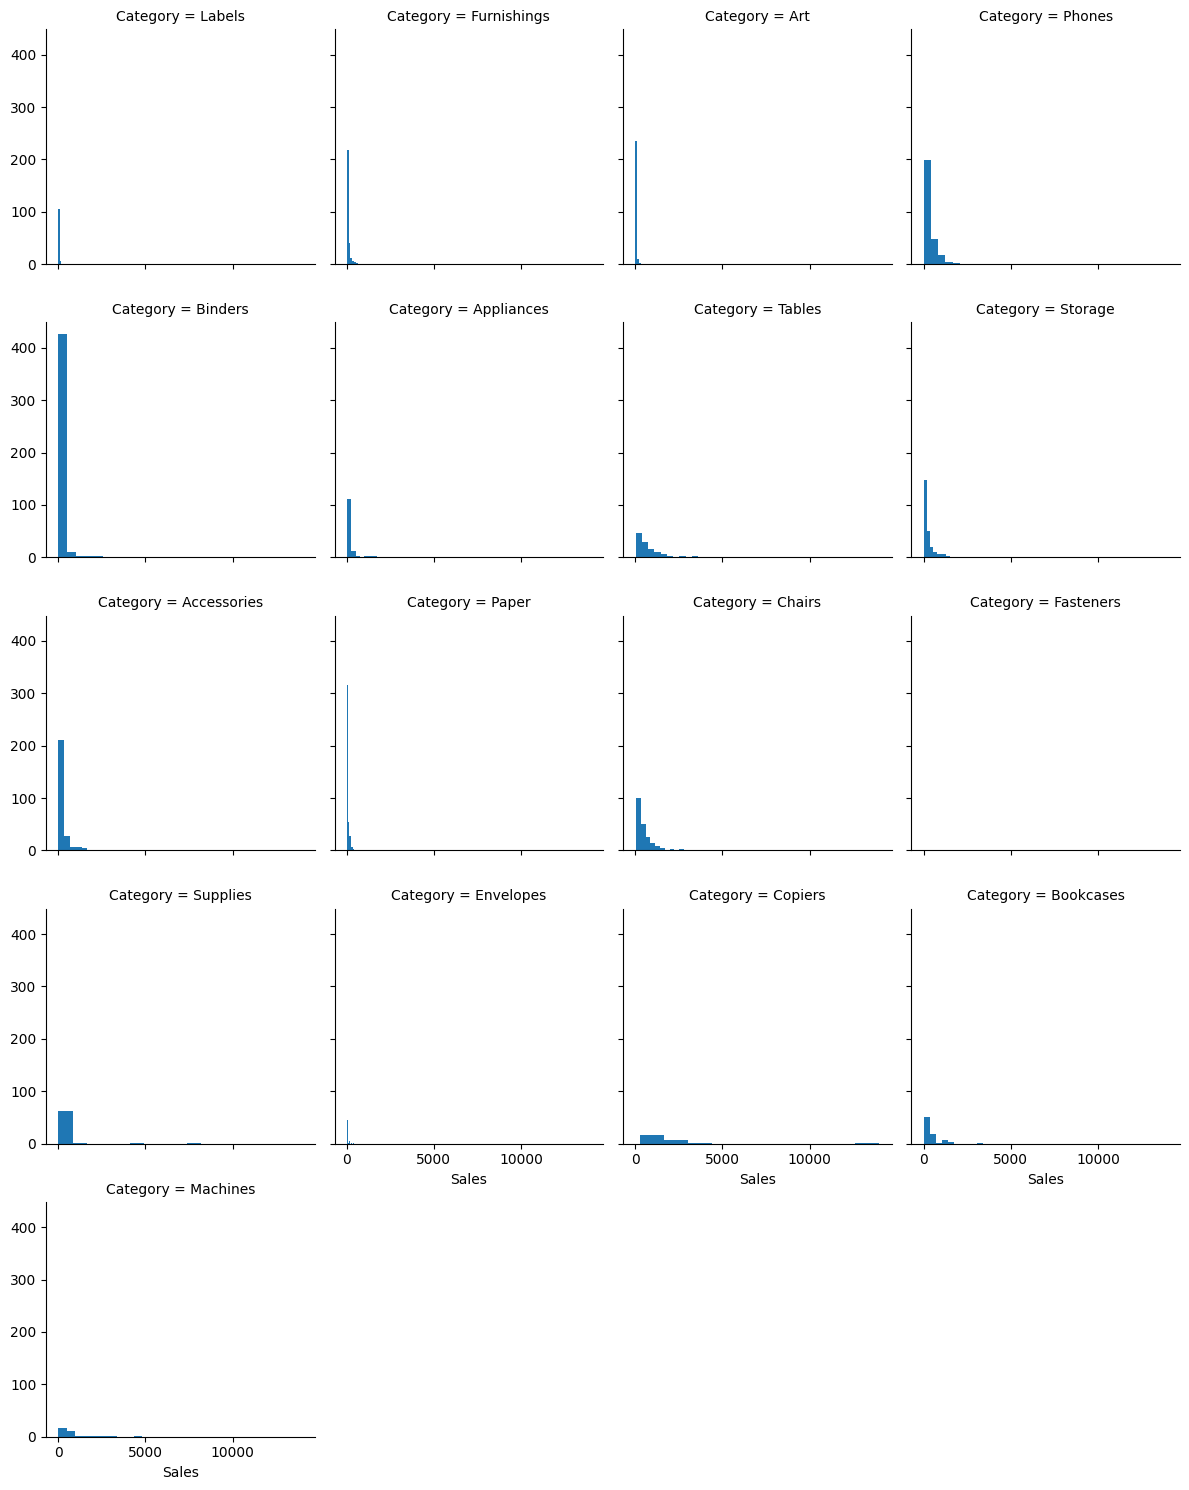

In [35]:
# Facet Grid Plot of Sales Distribution by Category
g = sns.FacetGrid(df, col='Category', col_wrap=4)
g.map(plt.hist, 'Sales', bins=10)
plt.show()


In [36]:
# Average sales per customer
average_sales_per_customer = df.groupby('Customer Name')['Sales'].mean()
print("Average sales per customer:\n", average_sales_per_customer)


Average sales per customer:
 Customer Name
AaronBergman         103.196667
AaronHawkins         265.626000
AaronSmayling        245.676667
AdamBellavance       668.845000
AdamHart              92.754000
                        ...    
XylonaPreis           56.817273
YanaSorensen         948.038333
YosephCarroll        607.840000
ZuschussCarroll      165.068125
ZuschussDonatelli     76.550000
Name: Sales, Length: 681, dtype: float64


In [37]:
#Total profit per customer
total_profit_per_customer = df.groupby('Customer Name')['Profit'].sum()
print("Total profit per customer:\n", total_profit_per_customer)


Total profit per customer:
 Customer Name
AaronBergman           15.00
AaronHawkins          179.89
AaronSmayling          19.15
AdamBellavance        355.07
AdamHart               99.28
                      ...   
XylonaPreis           281.81
YanaSorensen         1529.19
YosephCarroll         382.06
ZuschussCarroll       346.11
ZuschussDonatelli      42.46
Name: Profit, Length: 681, dtype: float64


In [40]:
# Calculate total sales
total_sales = df['Sales'].sum()

# Calculate total profit
total_profit = df['Profit'].sum()

# Calculate profit margin
profit_margin = (total_profit / total_sales) * 100
print("Profit margin:", profit_margin)



Profit margin: 14.859945692290841
